# Data cleaning

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

### Shops data

In [2]:
df_info = pd.read_csv(r'C:\Users\Fardin\Desktop\Projects\rit_competition\pharm_info.csv')

In [3]:
df_info.head()

,storenum,storename,telephone,address1,address2,city,state,zipcode,zipcode4,longitude,latitude,website,orgname
0,2850.0,CVS - 1142,585-671-5665,1900 EMPIRE BOULEVARD,NaN,WEBSTER,NY,14580,1934.0,-77.501365,43.191229,HTTP://WWW.CVS.COM,CVS ALBANY LLC
1,2849.0,CVS - 2067,585-321-2581,2580 EAST HENRIETTA ROAD,NaN,ROCHESTER,NY,14623,4526.0,-77.606816,43.069235,HTTP://WWW.CVS.COM,CVS ALBANY LLC
2,2852.0,CVS - 2217,585-723-3051,878 LONG POND ROAD,NaN,GREECE,NY,14612,3049.0,-77.695905,43.238923,HTTP://WWW.CVS.COM,CVS ALBANY LLC
3,4603.0,CVS - 2218,585-581-5101,3750 MOUNT READ BOULEVARD,NaN,ROCHESTER,NY,14616,3436.0,-77.658331,43.227241,HTTP://WWW.CVS.COM,CVS ALBANY LLC
4,6057.0,CVS - 2501,585-426-2991,2709 CHILI AVENUE,NaN,ROCHESTER,NY,14624,4123.0,-77.709106,43.122328,HTTP://WWW.CVS.COM,CVS ALBANY LLC


In [4]:
#Dropping stores with no store numbers

df_info = df_info.dropna(subset=['storenum'])

In [5]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   storenum   69 non-null     float64
 1   storename  69 non-null     object 
 2   telephone  69 non-null     object 
 3   address1   69 non-null     object 
 4   address2   2 non-null      object 
 5   city       69 non-null     object 
 6   state      69 non-null     object 
 7   zipcode    69 non-null     int64  
 8   zipcode4   69 non-null     float64
 9   longitude  69 non-null     float64
 10  latitude   69 non-null     float64
 11  website    69 non-null     object 
 12  orgname    69 non-null     object 
dtypes: float64(4), int64(1), object(8)
memory usage: 7.5+ KB


In [6]:
#Dropping columns that I don't think will be useful for data analysis

df_info = df_info.drop(['telephone','address1','address2','state','website'],axis = 1)

In [7]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   storenum   69 non-null     float64
 1   storename  69 non-null     object 
 2   city       69 non-null     object 
 3   zipcode    69 non-null     int64  
 4   zipcode4   69 non-null     float64
 5   longitude  69 non-null     float64
 6   latitude   69 non-null     float64
 7   orgname    69 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 4.9+ KB


### Sales data

In [8]:
df_sales = pd.read_csv(r'C:\Users\Fardin\Desktop\Projects\rit_competition\pharm_sales.csv')

In [9]:
df_sales.head()

,invnum,date,storenum,vendornum,itemnum,itemcategory,productcost,product_retail_price,units_sold,sales_num
0,INV-31573500023,11/2/2020,3696,259.0,11777,Food and beverages,6.63,9.95,12,120.59
1,INV-20889900001,7/29/2019,2528,260.0,10803,Diet and nutrition items,7.35,11.03,6,74.12
2,INV-20842300030,7/25/2019,5501,260.0,11294,Skin care items,8.00,12.00,4,61.44
3,INV-28440700003,7/2/2020,5057,434.0,36301,Seasonal products,4.13,6.20,3,21.39
4,INV-28440700012,7/2/2020,5057,259.0,11774,Skin care items,3.07,4.61,8,36.51


In [10]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990746 entries, 0 to 990745
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   invnum                990746 non-null  object 
 1   date                  990746 non-null  object 
 2   storenum              990746 non-null  int64  
 3   vendornum             990745 non-null  float64
 4   itemnum               990746 non-null  int64  
 5   itemcategory          990746 non-null  object 
 6   productcost           990746 non-null  float64
 7   product_retail_price  990746 non-null  float64
 8   units_sold            990746 non-null  int64  
 9   sales_num             990745 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 75.6+ MB


### Merging the two dataframes

In [11]:
#Merging both of them using the storenumber field as that is unique for stores.

df_merged = pd.merge(df_sales, df_info, on='storenum', how='outer')

In [12]:
df_merged.head()

,invnum,date,storenum,vendornum,itemnum,itemcategory,productcost,product_retail_price,units_sold,sales_num,storename,city,zipcode,zipcode4,longitude,latitude,orgname
0,INV-31573500023,11/2/2020,3696,259.0,11777,Food and beverages,6.63,9.95,12,120.59,WAL-MART - 1610,GREECE,14626,3459.0,-77.724197,43.214602,WAL-MART STORES EAST LP
1,INV-20309800006,7/1/2019,3696,260.0,25608,Personal hygiene,12.96,19.44,6,118.97,WAL-MART - 1610,GREECE,14626,3459.0,-77.724197,43.214602,WAL-MART STORES EAST LP
2,INV-20890000006,7/29/2019,3696,297.0,35916,OTC/VMS,3.37,5.06,12,62.54,WAL-MART - 1610,GREECE,14626,3459.0,-77.724197,43.214602,WAL-MART STORES EAST LP
3,INV-20462900015,7/8/2019,3696,260.0,43334,Skin care items,5.00,7.50,24,167.40,WAL-MART - 1610,GREECE,14626,3459.0,-77.724197,43.214602,WAL-MART STORES EAST LP
4,INV-20890000018,7/29/2019,3696,370.0,64009,OTC/VMS,11.49,17.24,6,124.13,WAL-MART - 1610,GREECE,14626,3459.0,-77.724197,43.214602,WAL-MART STORES EAST LP


In [16]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990744 entries, 0 to 990743
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   invnum                990744 non-null  object 
 1   date                  990744 non-null  object 
 2   storenum              990744 non-null  int64  
 3   vendornum             990744 non-null  float64
 4   itemnum               990744 non-null  int64  
 5   itemcategory          990744 non-null  object 
 6   productcost           990744 non-null  float64
 7   product_retail_price  990744 non-null  float64
 8   units_sold            990744 non-null  int64  
 9   sales_num             990744 non-null  float64
 10  storename             990744 non-null  object 
 11  city                  990744 non-null  object 
 12  zipcode               990744 non-null  int64  
 13  zipcode4              990744 non-null  float64
 14  longitude             990744 non-null  float64
 15  

In [14]:
df_merged = df_merged.dropna()

df_merged = df_merged.reset_index(drop=True)

### Pharmacy map

In [32]:
from matplotlib import pyplot as plt
import numpy as np

In [47]:
BBox = (df_info.longitude.min(),   df_info.longitude.max(),      
         df_info.latitude.min(), df_info.latitude.max())

In [48]:
BBox

(-77.806208, -77.439842, 42.949811, 43.250817)

In [53]:
ruh_m = plt.imread('geo_rochester.png')

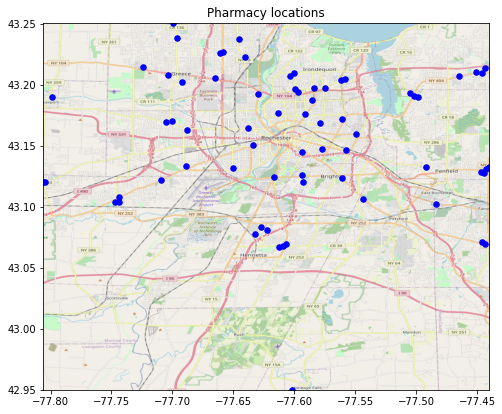

In [54]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_info.longitude, df_info.latitude, zorder=1, alpha= 1, c='b', s=30)
ax.set_title('Pharmacy locations')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')